In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def explode_variable(series):
    series = series.dropna()
    series = series.str.split(';')
    series = series.explode()
    return series

In [3]:
df = pd.read_csv('survey_data_17_to_19.csv',low_memory=False)

In [4]:
is_freelance = df['Employment'].str.contains('freelance')
free_df = df[is_freelance]
free_df.head()

,Employment,Country,Education,Major,DeveloperType,JobSatisfaction,Salary,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,Year
6,"Independent contractor, freelancer, or self-em...",France,Master's degree,Computer science or software engineering,Mobile developer; Desktop applications developer,Moderately dissatisfied,NaN,Objective-C; Swift,PostgreSQL,iOS; Amazon Web Services (AWS),NaN,2017
11,"Independent contractor, freelancer, or self-em...",United States,Primary/elementary school,NaN,Desktop applications developer,Moderately dissatisfied,NaN,JavaScript; VB.NET,NaN,Windows Desktop,NaN,2017
18,"Independent contractor, freelancer, or self-em...",Italy,Secondary school,NaN,Web developer,Moderately dissatisfied,NaN,PHP; SQL,MySQL,Windows Desktop; WordPress,NaN,2017
27,"Independent contractor, freelancer, or self-em...",Germany,Professional degree,Computer science or software engineering,NaN,NaN,NaN,C#; Java,NaN,Windows Desktop; Linux Desktop,NaN,2017
28,"Independent contractor, freelancer, or self-em...",Brazil,Some college/university study without earning ...,Computer science or software engineering,Web developer,Neither satisfied nor dissatisfied,NaN,JavaScript,MongoDB,NaN,Node.js; React; Firebase,2017


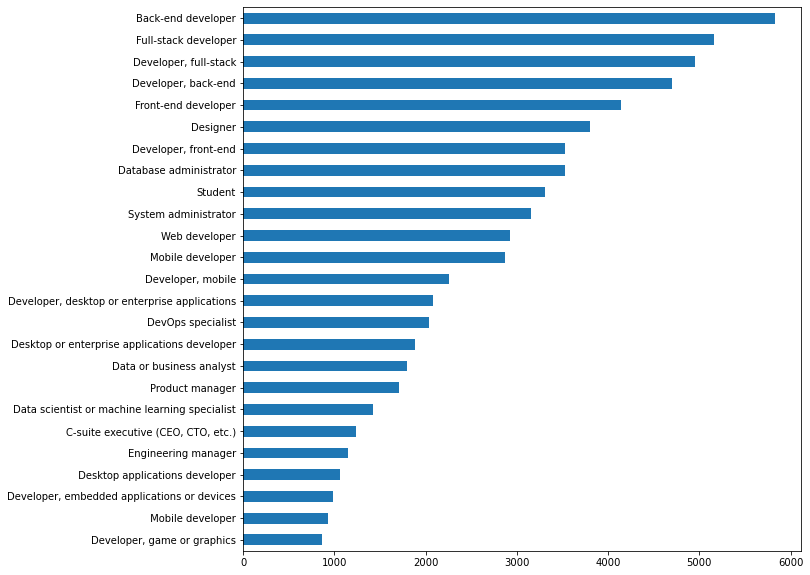

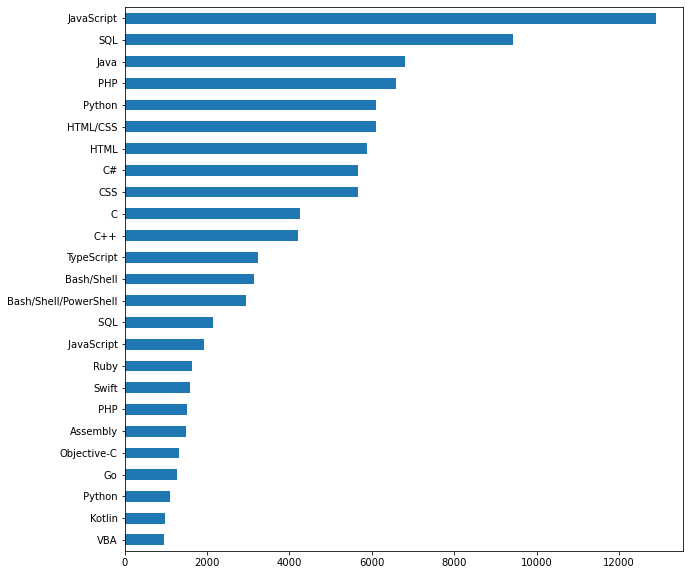

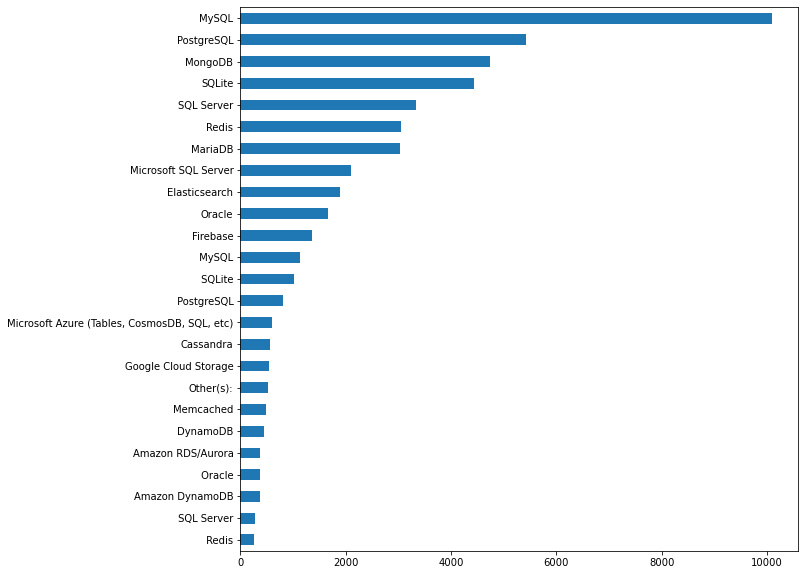

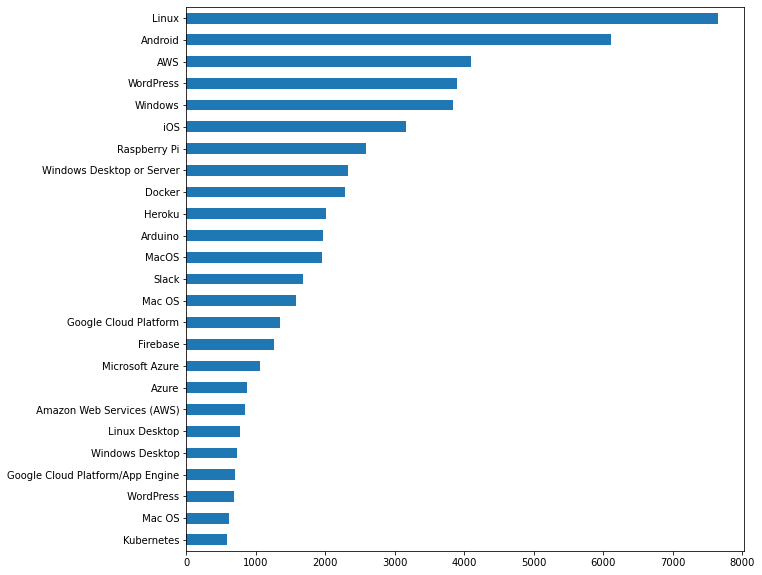

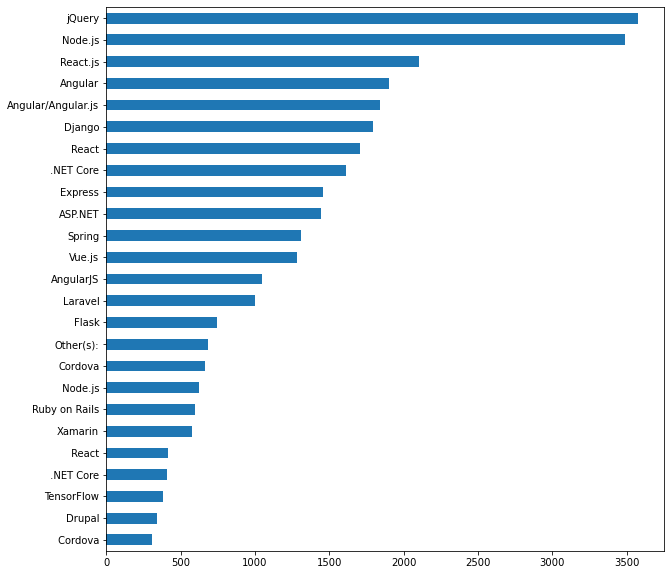

In [5]:
for col in ['DeveloperType','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith']:
    plt.figure(figsize=(10,10))
    series = explode_variable(free_df[col])
    series.value_counts().head(25).sort_values().plot(kind='barh')
    plt.show()

In [6]:
is_fulltime = df['Employment'].str.contains('full-time')
full_df = df[is_fulltime]
full_df.head()

,Employment,Country,Education,Major,DeveloperType,JobSatisfaction,Salary,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,Year
0,Employed full-time,United Kingdom,Bachelor's degree,Computer science or software engineering,Other,Moderately dissatisfied,113750.0,Java; PHP; Python,MySQL,NaN,NaN,2017
1,Employed full-time,United States,Doctoral degree,A non-computer-focused engineering discipline,NaN,Slightly dissatisfied,NaN,Matlab; Python; R; SQL,MongoDB; Redis; SQL Server; MySQL; SQLite,Windows Desktop; Linux Desktop; Mac OS; Amazon...,React,2017
2,Employed full-time,Switzerland,Master's degree,Computer science or software engineering,Mobile developer; Graphics programming; Deskto...,Moderately dissatisfied,NaN,NaN,NaN,NaN,NaN,2017
3,Employed full-time,United States,Master's degree,A non-computer-focused engineering discipline,NaN,Slightly satisfied,NaN,Matlab; Python,SQLite,Windows Desktop,NaN,2017
4,Employed full-time,Poland,Master's degree,Computer science or software engineering,Web developer,Slightly satisfied,NaN,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Redis; MySQL; PostgreSQL,Amazon Web Services (AWS),React,2017


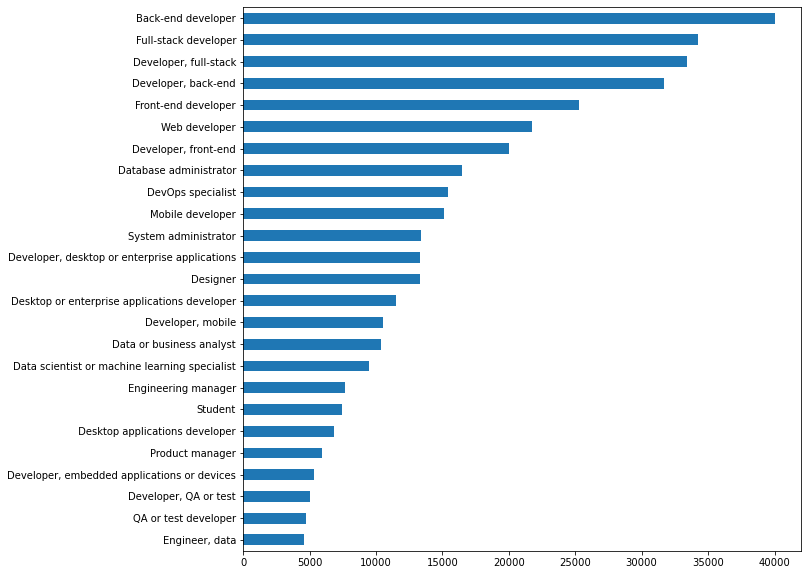

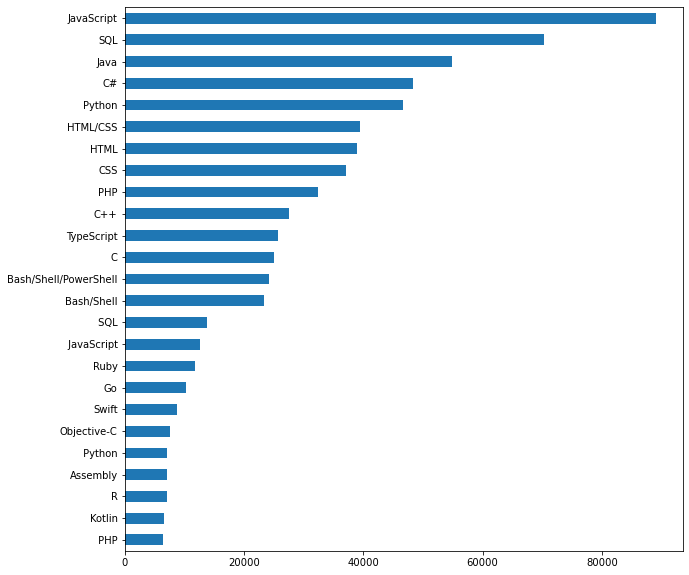

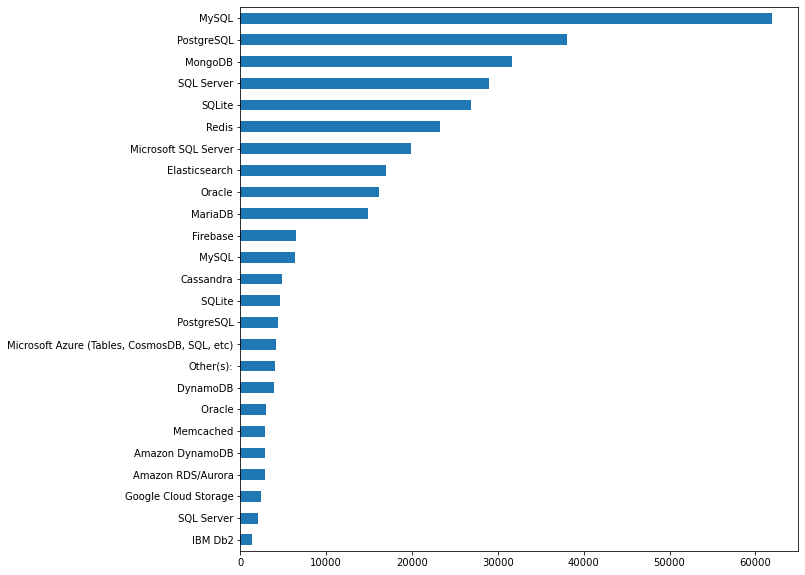

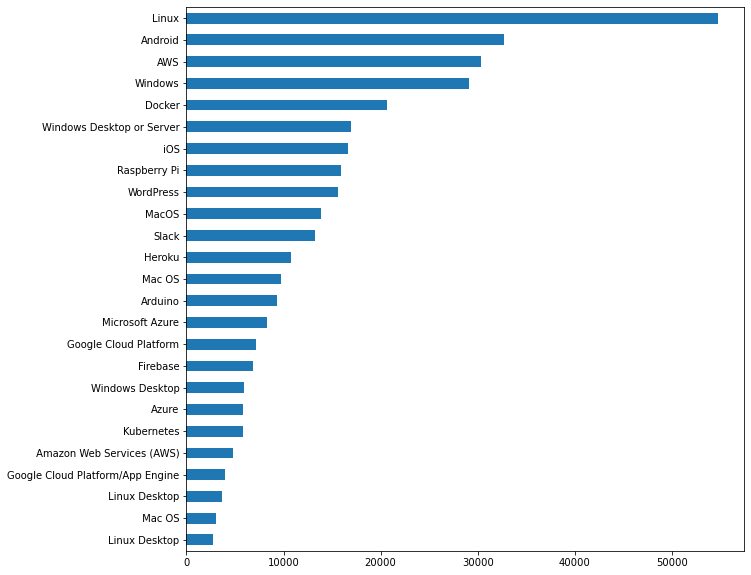

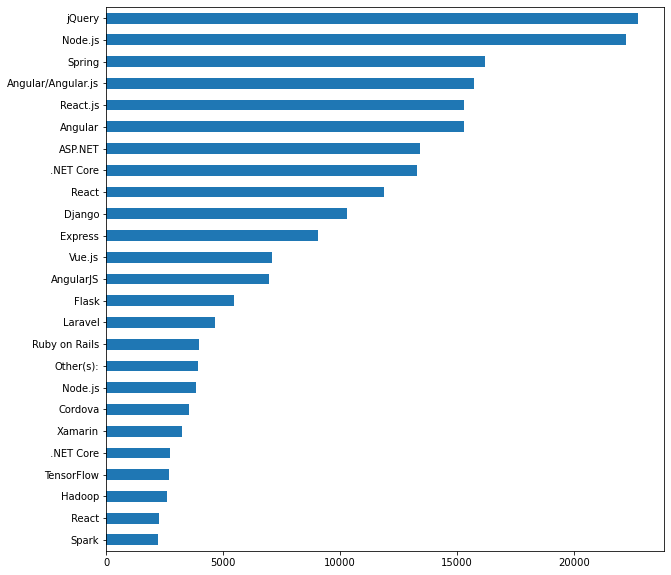

In [7]:
for col in ['DeveloperType','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith']:
    plt.figure(figsize=(10,10))
    series = explode_variable(full_df[col])
    series.value_counts().head(25).sort_values().plot(kind='barh')
    plt.show()